<h1>FINALS ACTIVITIES</h1>
<hr>
<h3>Coedy de la Cruz</h3>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv("C:\\Users\\User\\Desktop\\3B\\dengue.csv")
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1> Visualization Using Seaborn </h1>

<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

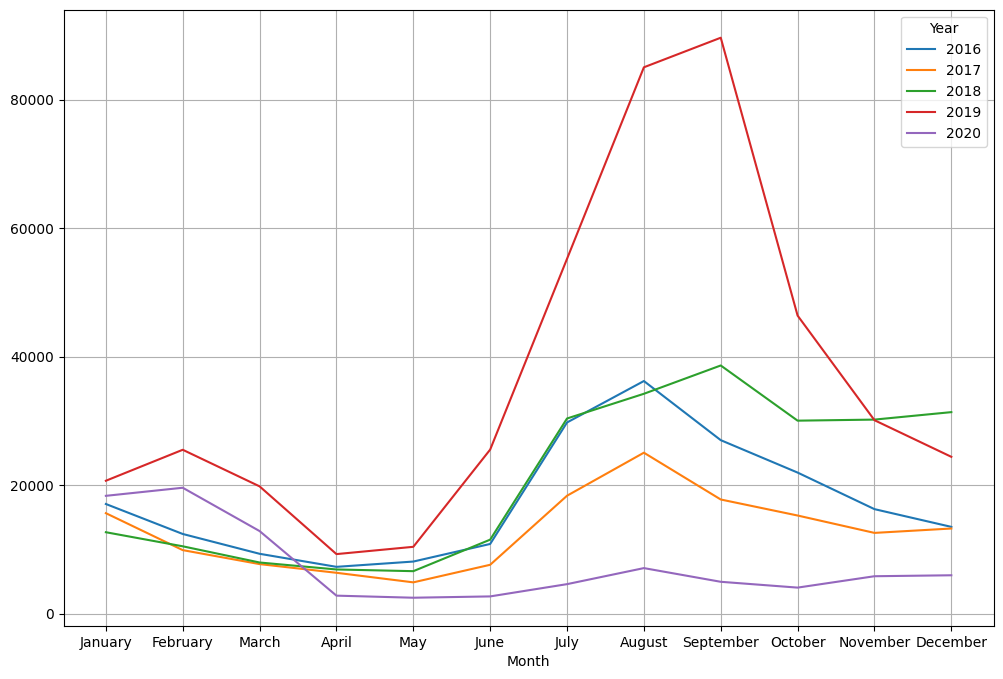

In [5]:
#list
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(["Month", "Year"])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h1> LINE PLOT WITH SEABORN </h1>

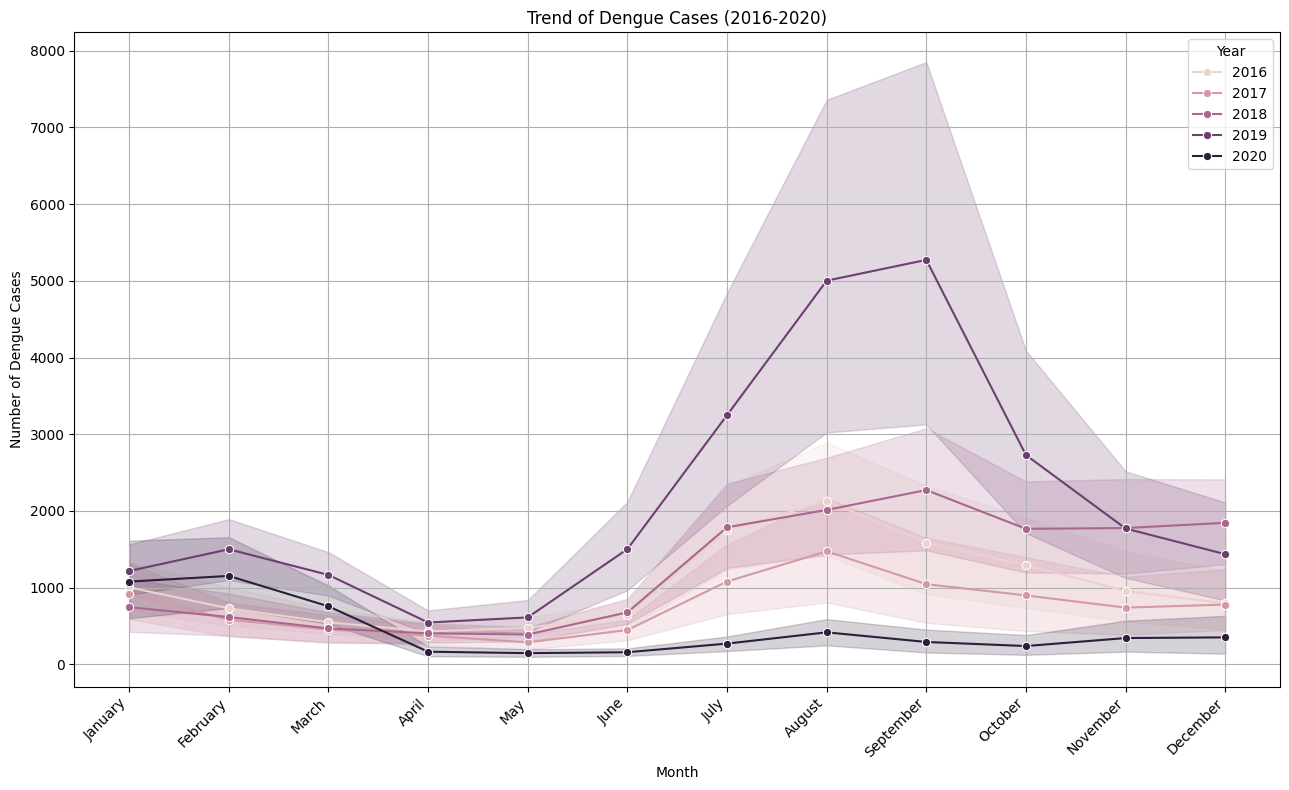

In [6]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Create the line plot
sns.lineplot(data = dengue, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

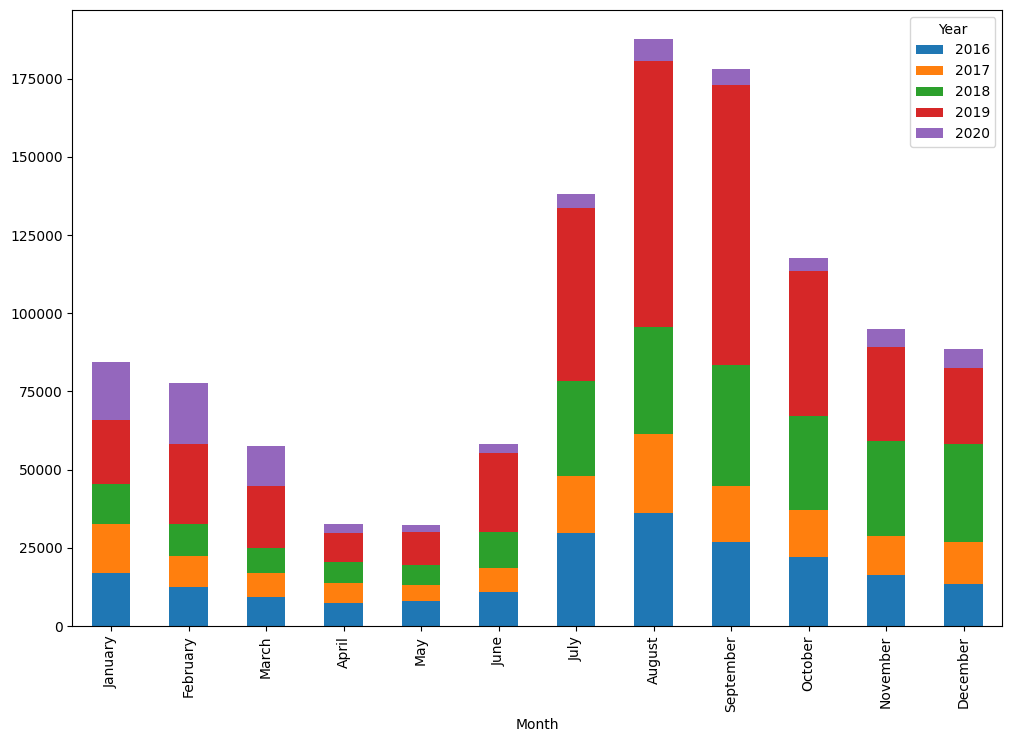

In [7]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1>Scatterplot </h1>

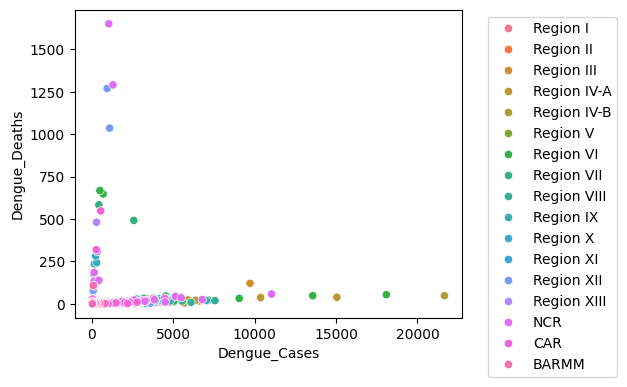

In [8]:
sns.scatterplot(data=dengue, x="Dengue_Cases", y="Dengue_Deaths", hue="Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gcf().set_size_inches(5,4)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

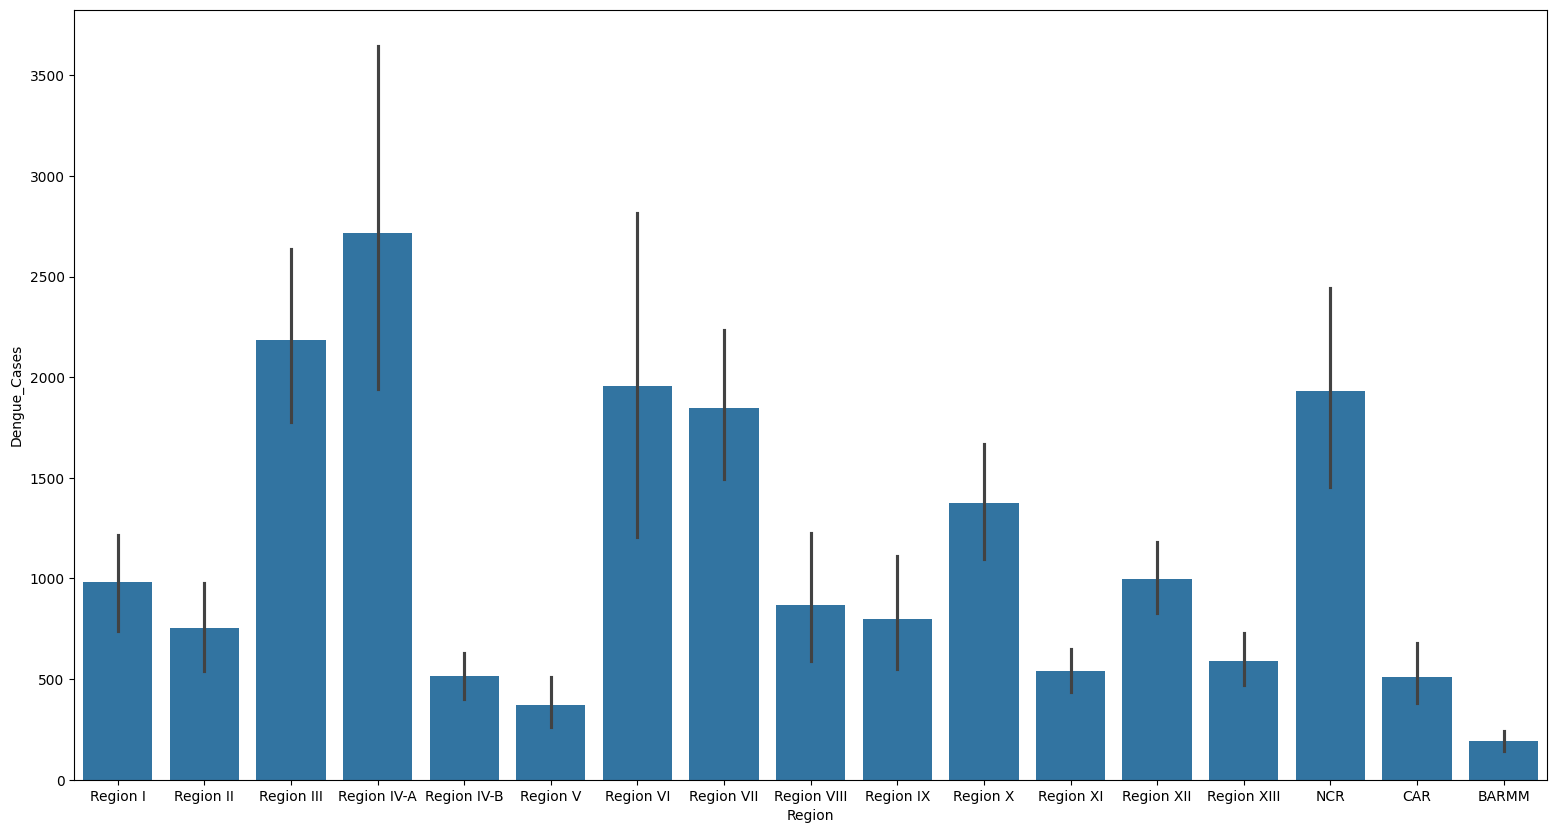

In [9]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [10]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [11]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [12]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [13]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


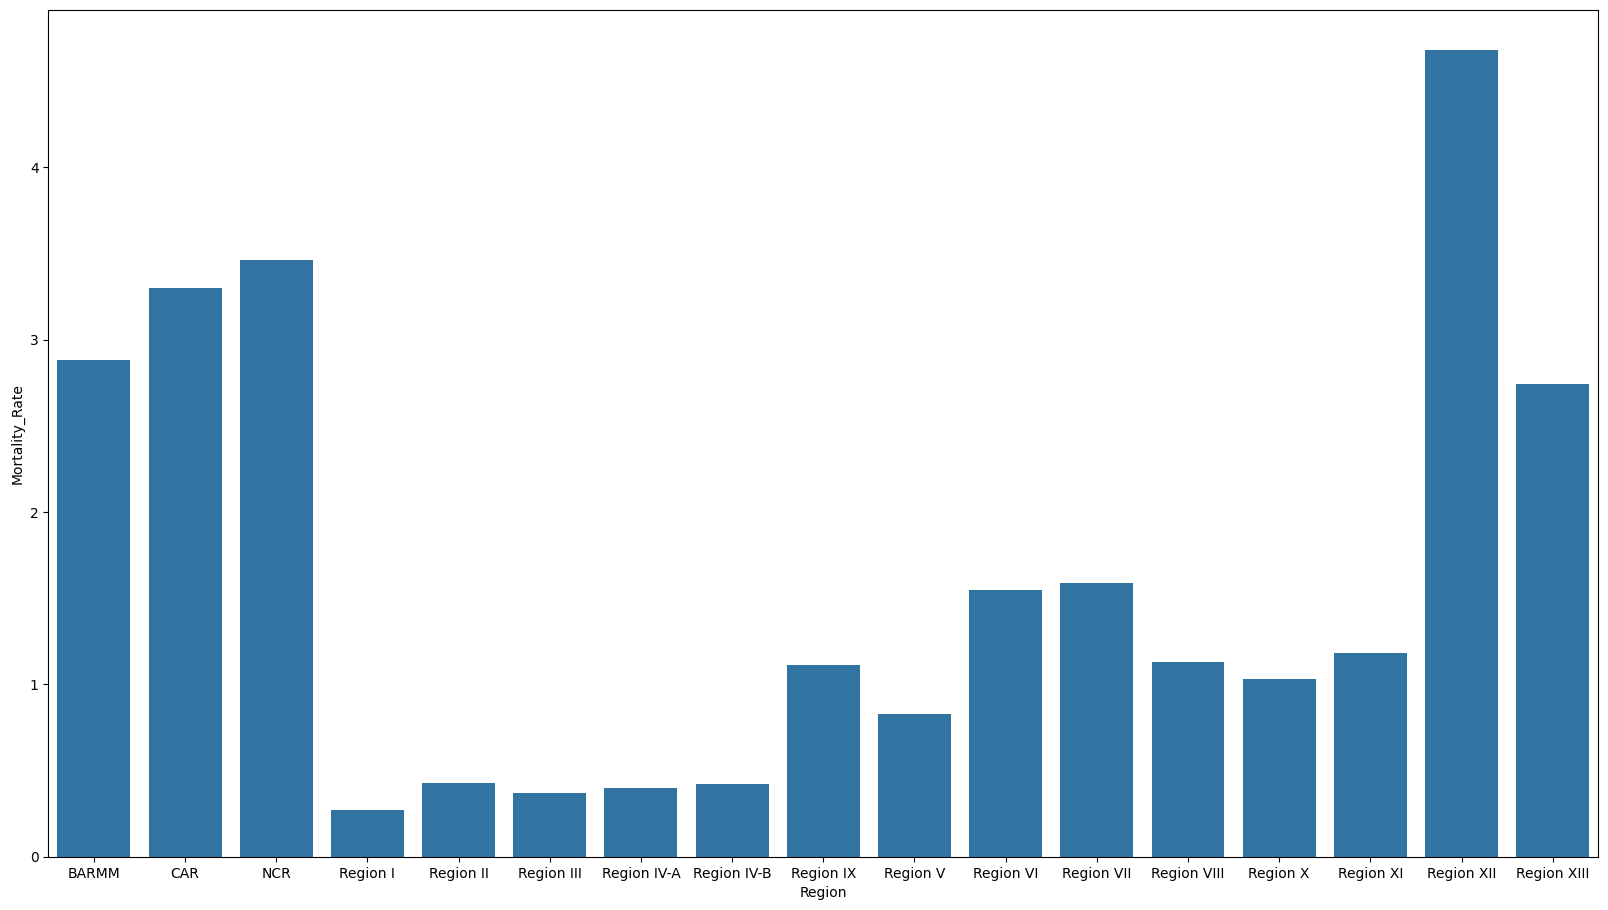

In [14]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

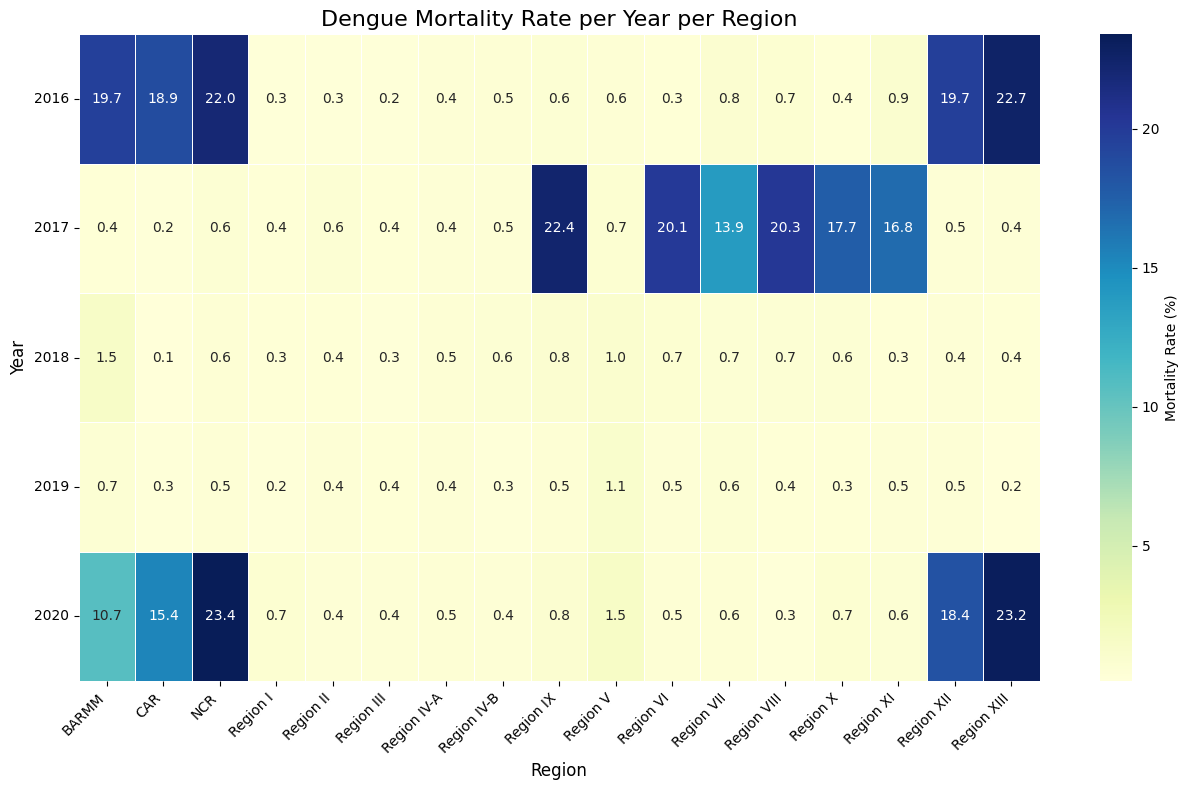

In [15]:

dengue['Mortality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

# Group by Year and Region and calculate the mean mortality rate
heatmap_data = dengue.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()

# Create the heatmap

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.gcf().set_size_inches(13, 8)
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> REGION IV 4A - DENGUE CASES </h1>

In [16]:
region4 = dengue[dengue['Region'] == "Region IV-A"]

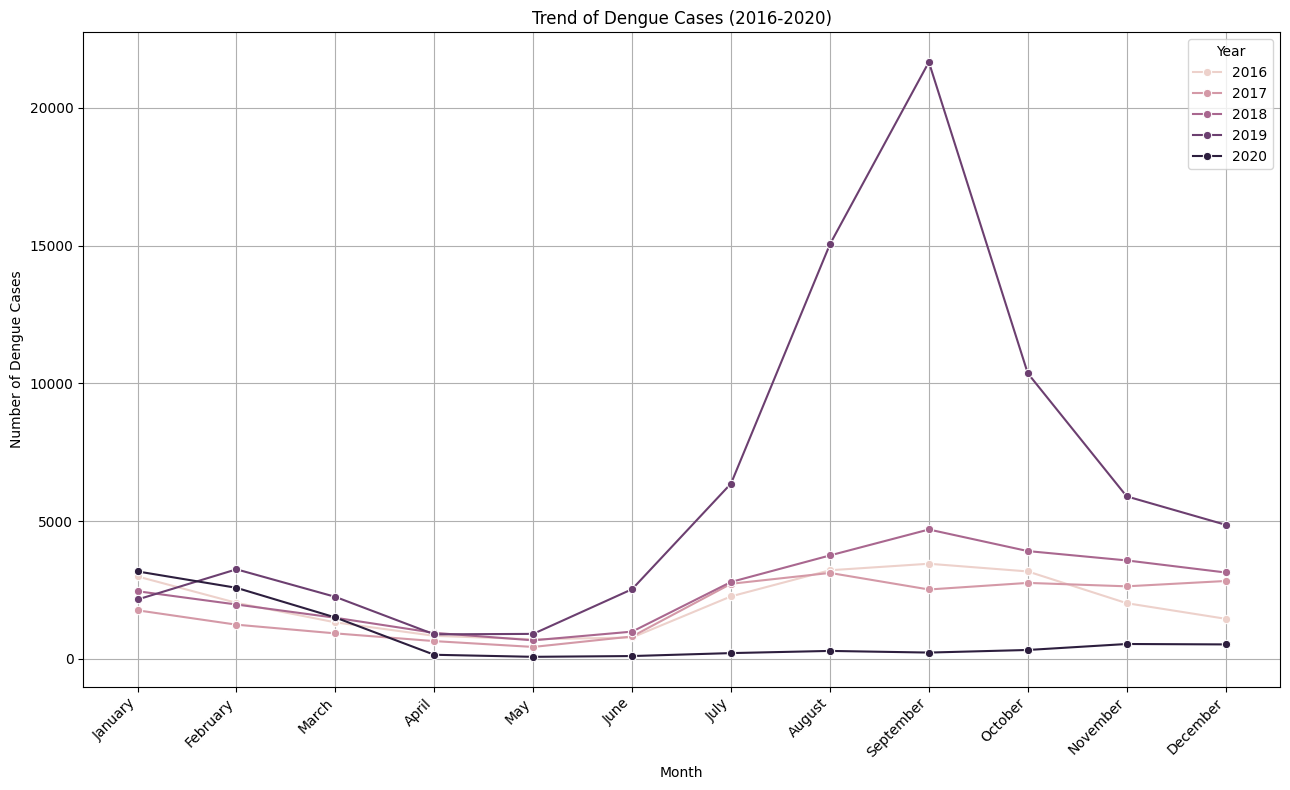

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)



# Create the line plot
sns.lineplot(data = region4, x='Month', y='Dengue_Cases', hue='Year', marker='o')
plt.gcf().set_size_inches(13,8)
plt.title('Trend of Dengue Cases (2016-2020)')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> PREDICTIVES </h1>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


Month             category
Year                 int64
Region              object
Dengue_Cases         int64
Dengue_Deaths        int64
Mortality_Rate     float64
dtype: object
Mean Squared Error: 1805441.73572055
Predicted number of dengue cases in 2025 : 1280.286494492415


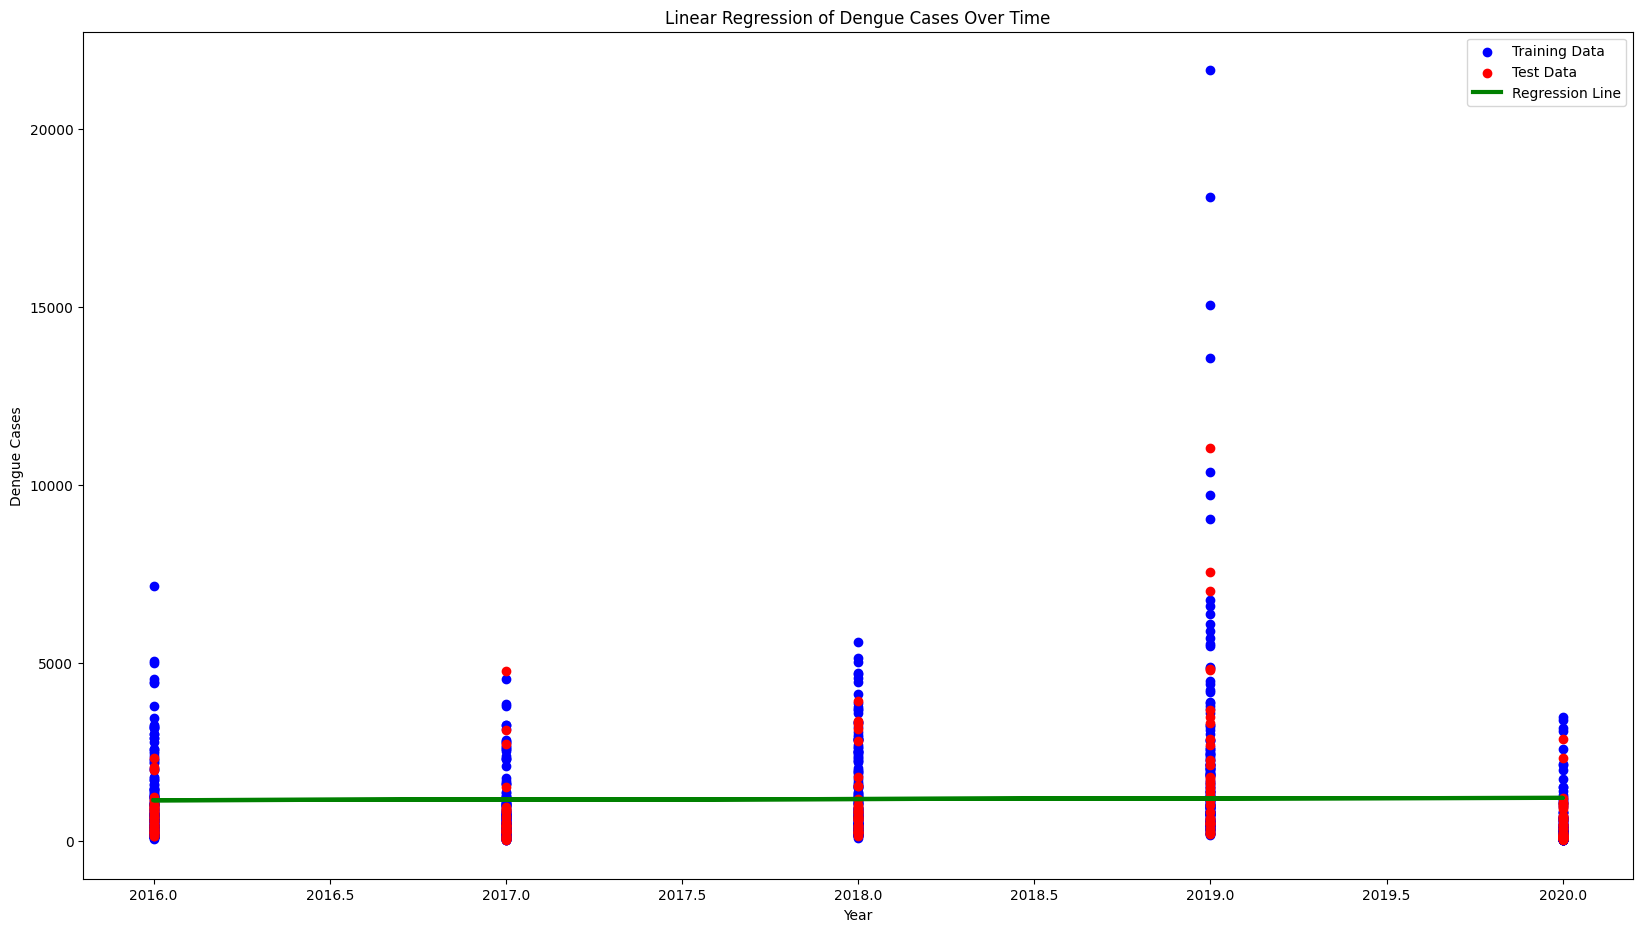

In [19]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


In [20]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

In [21]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [22]:
dengue_NCR

Region
NCR    115966
Name: Dengue_Cases, dtype: int64

In [23]:
dengue["Region"]=="NCR"

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Region, Length: 1020, dtype: bool

In [24]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,January,2016-01-01,Region I,705,1,0.141844
1,February,2016-01-01,Region I,374,0,0.000000
2,March,2016-01-01,Region I,276,0,0.000000
3,April,2016-01-01,Region I,240,2,0.833333
4,May,2016-01-01,Region I,243,1,0.411523
...,...,...,...,...,...,...
1015,August,2020-01-01,BARMM,91,0,0.000000
1016,September,2020-01-01,BARMM,16,8,50.000000
1017,October,2020-01-01,BARMM,13,9,69.230769
1018,November,2020-01-01,BARMM,15,1,6.666667


In [25]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()


In [26]:
dengue_NCR_2016

np.int64(13002)

In [27]:
dengue["Year"] == "2016"

0        True
1        True
2        True
3        True
4        True
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Year, Length: 1020, dtype: bool

<hr>
<h1>10 Question and Insights</h1>
<hr>



<h1>Q1): How Does Dengue Mortality Rate Change with Increasing Cases?</h1>

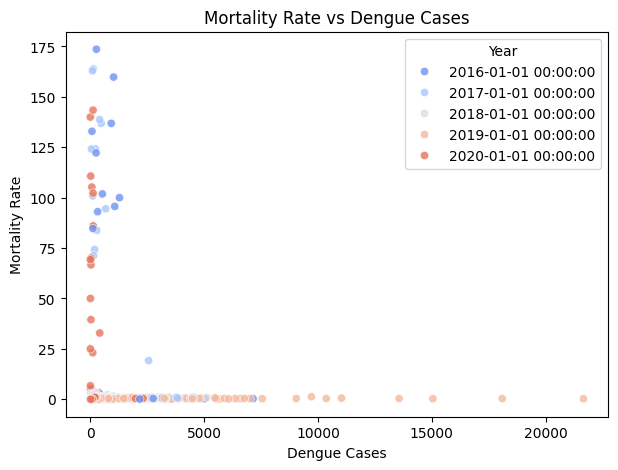

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Dengue_Cases', y='Mortality_Rate', hue='Year', data=dengue, palette='coolwarm', alpha=0.8)
plt.title('Mortality Rate vs Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Mortality Rate')
plt.show()


<h3>Insights: When the number of cases gets extremely high mortality usually stabilizes or even goes down which means that during large outbreaks the treatment response is probably getting better. Nevertheless some situations with high mortality and few cases signal that the outbreaks were smaller but more deadly</h3>


<h1>Q2): Dengue Deaths vs Cases Correlation</h1>

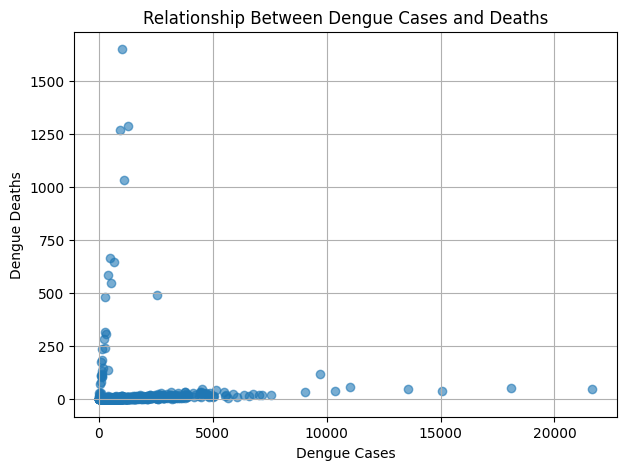

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(dengue['Dengue_Cases'], dengue['Dengue_Deaths'], alpha=0.6)
plt.title('Relationship Between Dengue Cases and Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.grid(True)
plt.show()


<h3>Insights: Areas or times having larger cases normally lose more people indicating that the degree of the outbreak is related to the number of deaths. The exceptions might be pointing to either better healthcare response or underreporting of cases.</h3>

<h1>Q3): Dengue Cases Heatmap by Month and Year</h1>

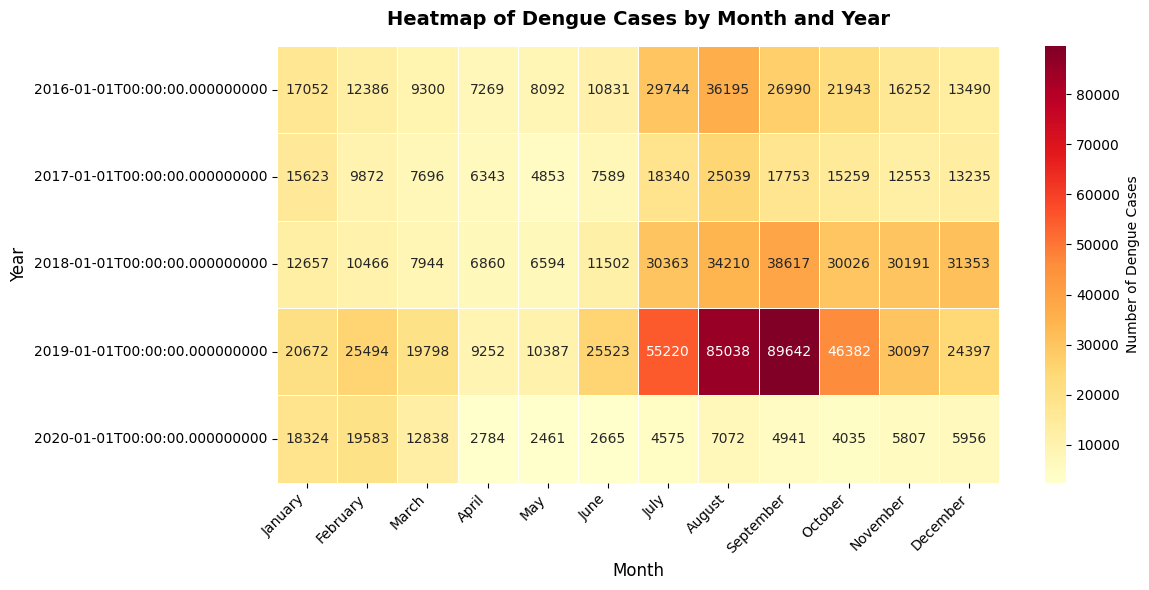

In [30]:
dengue['Month'] = pd.Categorical(
    dengue['Month'],
    categories=['January','February','March','April','May','June',
                'July','August','September','October','November','December'],
    ordered=True
)

pivot = dengue.pivot_table(
    values='Dengue_Cases',
    index='Year',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    cmap='YlOrRd',
    annot=True,
    fmt='.0f',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Dengue Cases'}
)

plt.title('Heatmap of Dengue Cases by Month and Year', fontsize=14, weight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h3>Insights: This Highlights the seasonality often higher in mid to late months of the year and shows which years had extreme outbreaks. </h3>

<h1> Q4): Monthly Dengue Cases Pattern Line by Month</h1>

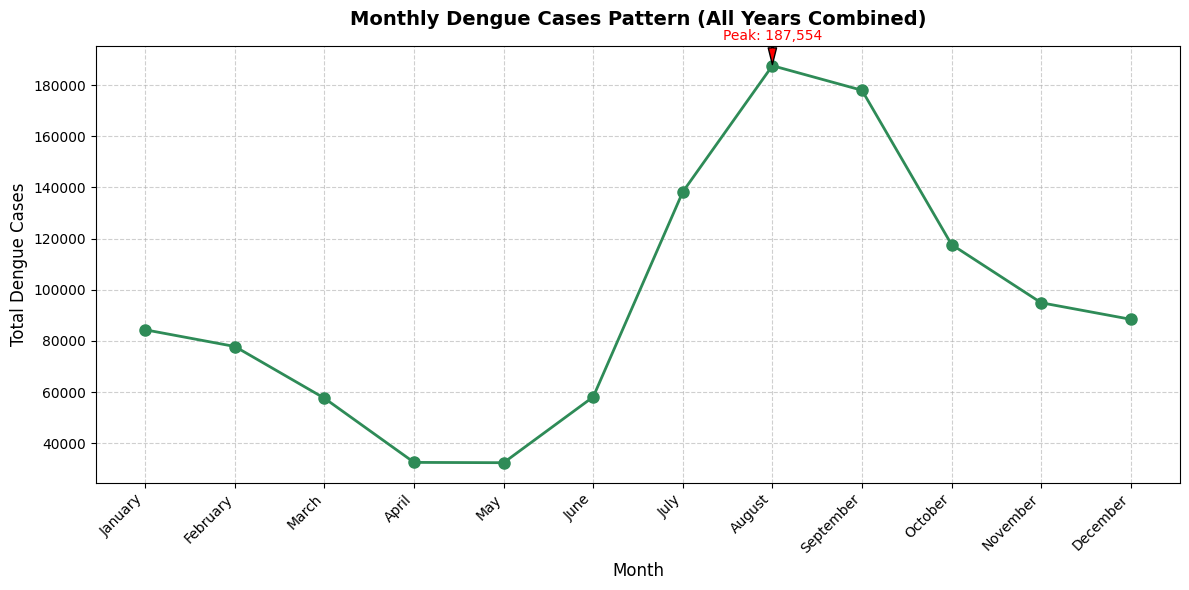

In [31]:
dengue['Month'] = pd.Categorical(
    dengue['Month'],
    categories=['January','February','March','April','May','June',
                'July','August','September','October','November','December'],
    ordered=True
)

monthly = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(
    monthly['Month'],
    monthly['Dengue_Cases'],
    marker='o',
    linestyle='-',
    color='#2E8B57',
    linewidth=2,
    markersize=8
)

plt.title('Monthly Dengue Cases Pattern (All Years Combined)', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Dengue Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

max_month = monthly.loc[monthly['Dengue_Cases'].idxmax()]
plt.annotate(
    f"Peak: {int(max_month['Dengue_Cases']):,}",
    xy=(max_month['Month'], max_month['Dengue_Cases']),
    xytext=(max_month['Month'], max_month['Dengue_Cases'] + 10000),
    ha='center',
    fontsize=10,
    color='red',
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=6)
)

plt.tight_layout()
plt.show()

<h3>Insights: Rainy months mostly June to September which are the hardest for mosquitoes usually see an increase in cases. This underlines the importance of vector control verging on these months.</h3>

<h1>Q5): Mortality Rate vs Dengue Deaths</h1>

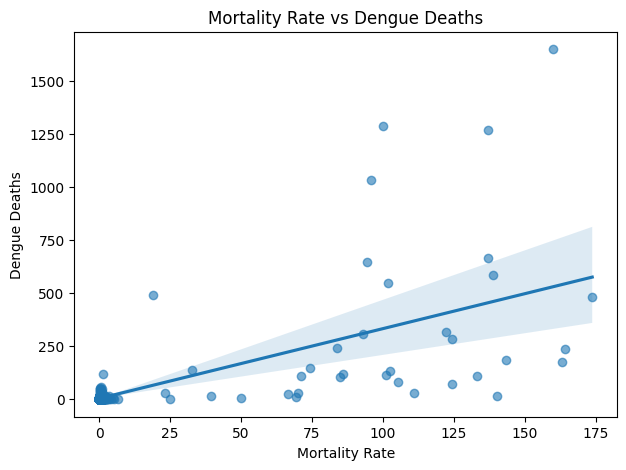

In [32]:
plt.figure(figsize=(7,5))
sns.regplot(x='Mortality_Rate', y='Dengue_Deaths', data=dengue, scatter_kws={'alpha':0.6})
plt.title('Mortality Rate vs Dengue Deaths')
plt.xlabel('Mortality Rate')
plt.ylabel('Dengue Deaths')
plt.show()


<h3>Insights: This shows Higher mortality rates correlate with an increase in the number of deaths,however some exceptions could point to locations where there are few cases but the death ratio is very high.</h3>

<h1>Q6): Which Region Has the Highest Yearly Increase in Dengue Cases?</h1>

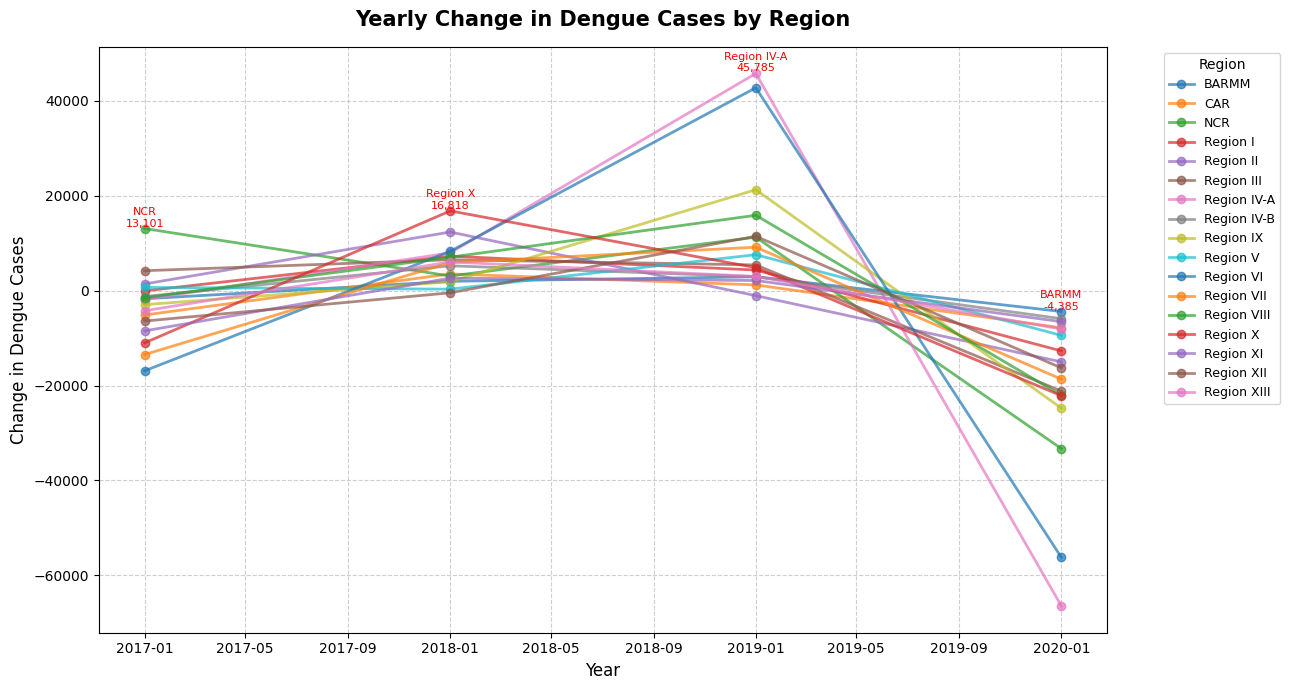

In [33]:
yearly_region = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()
pivot = yearly_region.pivot(index='Year', columns='Region', values='Dengue_Cases').fillna(0)
yearly_change = pivot.diff()
plt.figure(figsize=(13, 7))
for region in yearly_change.columns:
    plt.plot(
        yearly_change.index,
        yearly_change[region],
        marker='o',
        linewidth=2,
        alpha=0.7,
        label=region
    )
plt.title('Yearly Change in Dengue Cases by Region', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Change in Dengue Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(
    title='Region',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)
max_increase = yearly_change.max(axis=1)
for year in yearly_change.index:
    if pd.notna(max_increase[year]):  # skip NaN rows (like first year)
        max_region = yearly_change.loc[year].idxmax()
        plt.text(
            year,
            max_increase[year],
            f'{max_region}\n{int(max_increase[year]):,}',
            color='red',
            fontsize=8,
            ha='center',
            va='bottom'
        )
plt.tight_layout()
plt.show()


<h3>Inisghts: This chart shows that certain regions such as Region IV-A and NCR experienced sharp increases in dengue cases around 2018–2019. After 2019  cases dropped sharply across all regions by 2020, likely due to improved public health responses and increased awareness.</h3>

<h1>Q7): Top 5 Years with the Highest Dengue Deaths</h1>

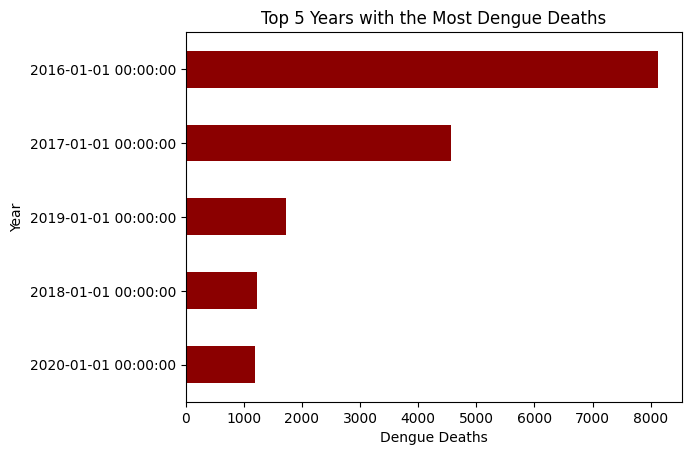

In [34]:
top5 = dengue.groupby('Year')['Dengue_Deaths'].sum().nlargest(5).sort_values()
top5.plot(kind='barh', color='darkred')
plt.title('Top 5 Years with the Most Dengue Deaths')
plt.xlabel('Dengue Deaths')
plt.ylabel('Year')
plt.show()


<h3>Insights: This year shows 2016 faced an extremely intense dengue epidemic causing around 8,000 fatalities almost twice as much as any other year in the top 5.</h3>

<h1>Q8): Mortality Rate Comparison by Region</h1>

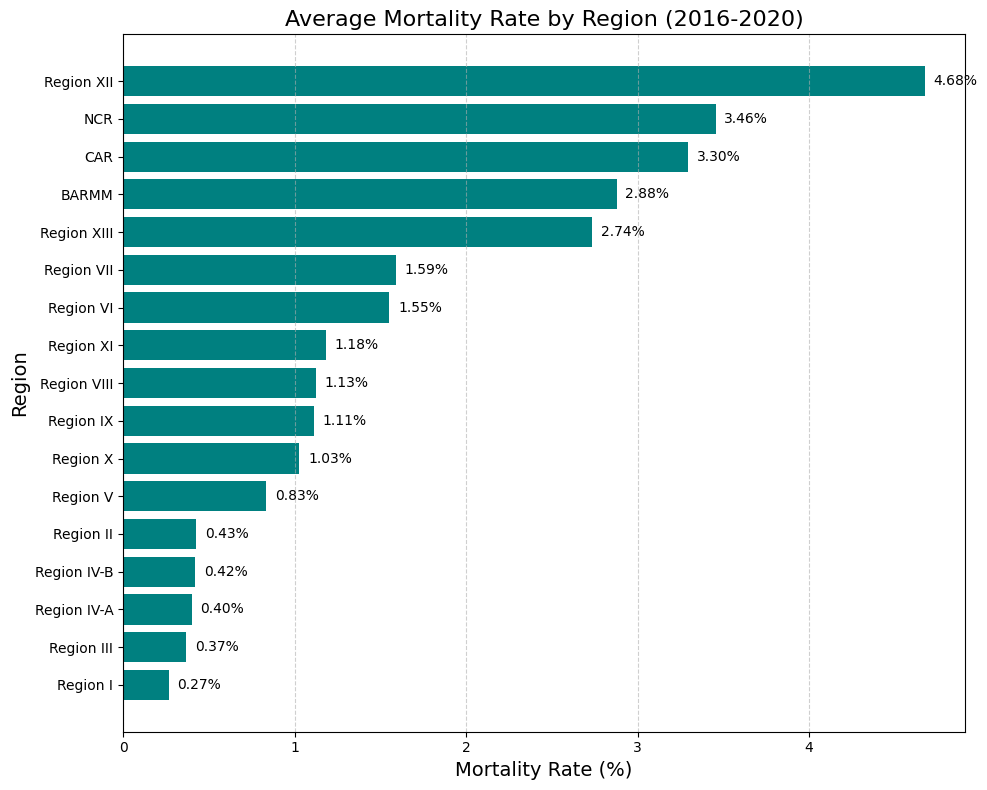

In [35]:
df_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
df_region['Mortality_Rate'] = (df_region['Dengue_Deaths'] / df_region['Dengue_Cases'].replace(0, 1)) * 100
region_rate = df_region.sort_values(by='Mortality_Rate', ascending=True)



plt.figure(figsize=(10, 8))
plt.barh(region_rate['Region'], region_rate['Mortality_Rate'], color='teal')
plt.title('Average Mortality Rate by Region (2016-2020)', fontsize=16)
plt.xlabel('Mortality Rate (%)', fontsize=14)
plt.ylabel('Region', fontsize=14)
for index, value in enumerate(region_rate['Mortality_Rate']):
    plt.text(value + 0.05, index, f'{value:.2f}%', va='center') 
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<h3>Insights: The bar chart shows that Region XII and NCR have the highest mortality rates indicating that Dengue cases in these areas are more likely to result in death.</h3>

<h1>Q9): Monthly Dengue Deaths Distribution</h1>

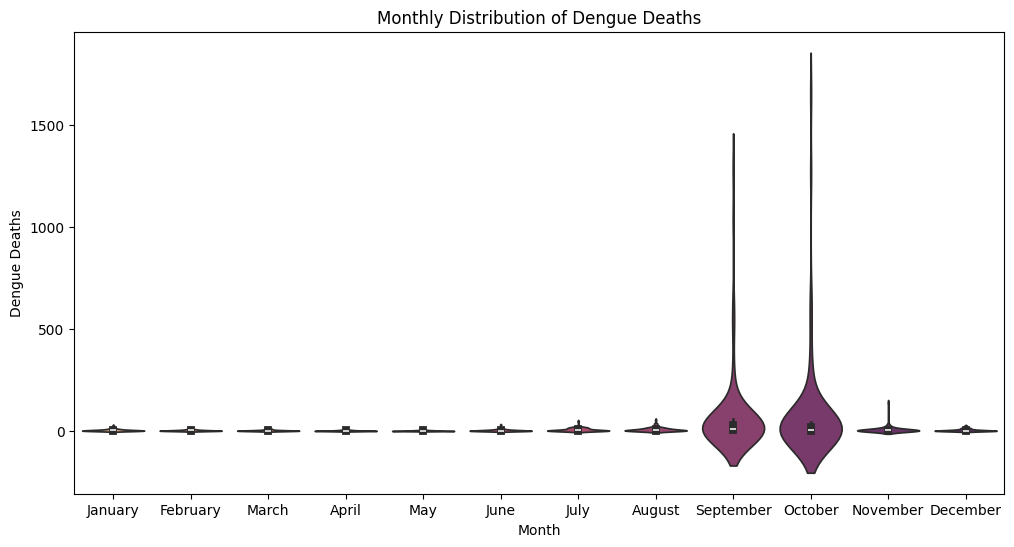

In [36]:
plt.figure(figsize=(12, 6))

sns.violinplot(x='Month', y='Dengue_Deaths', data=dengue, palette='flare')
plt.title('Monthly Distribution of Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.show()



<h3>Insight: The violin plot shows that dengue deaths are highly concentrated between September and October with wider spreads in these months indicating higher and more unpredictable death counts during this period.</h3>

<h1>Q10): Cases to Deaths Ratio by Region</h1>

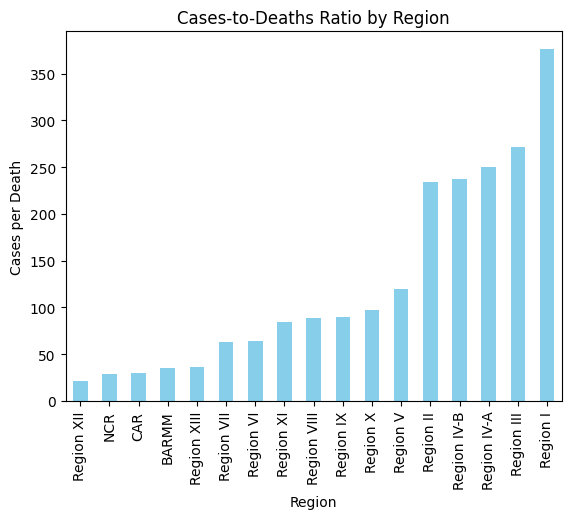

In [37]:
ratio = dengue.groupby('Region').apply(lambda x: x['Dengue_Cases'].sum() / x['Dengue_Deaths'].sum()).sort_values()
ratio.plot(kind='bar', color='skyblue')
plt.title('Cases-to-Deaths Ratio by Region')
plt.ylabel('Cases per Death')
plt.xlabel('Region')
plt.show()



<h3>Insights: The visualization shows that Region I has the highest cases t deaths ratio indicating effective healthcare response or less severe dengue cases. Region XII and NCR have the lowest ratios suggesting more fatal outbreaks or possible limitations in medical response and prevention efforts. </h3>